had to use sklearn test_train split to gather validation set
- was because validation_split on .fit() was creating val acc of 0

# Brain Scans Model

#### Orginal Model

In [1]:
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d (Conv2D)              (None, 70, 59, 256)       20992     
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 23, 19, 256)       0         
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 8, 7, 256)         5308672   
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
# _________________________________________________________________
# flatten (Flatten)            (None, 1024)              0         
# _________________________________________________________________
# dense (Dense)                (None, 100)               102500    
# _________________________________________________________________
# dropout (Dropout)            (None, 100)               0         
# _________________________________________________________________
# dense_1 (Dense)              (None, 4)                 404       
# =================================================================
# Total params: 5,432,568
# Trainable params: 5,432,568
# Non-trainable params: 0
# _________________________________________________________________

In [2]:
# 144/144 [==============================] - 2s 11ms/step - loss: 0.1732 - categorical_accuracy: 0.9375
# Train loss: 0.17316968739032745
# Train accuracy: 0.9375
# 17/17 [==============================] - 0s 11ms/step - loss: 0.2557 - categorical_accuracy: 0.8928
# validation loss: 0.25566068291664124
# validation accuracy: 0.892787516117096

In [3]:
# 40/40 [==============================] - 1s 14ms/step - loss: 1.0682 - categorical_accuracy: 0.6106
# Test loss: 1.0682283639907837
# Test accuracy: 0.6106333136558533

We found that the model is essentially memorizing the training set and not learning features of the images for feature detection. To combat this we tried to add more dropout layers, but that did not do much to change the output [2].

### Tweaks

#### Data Generator

We decided to use a tensorflow module that augments the images randomly as the model trains [3][4].

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

- This code here creates the image generator, what the parameters do are [4]
    - rotation_range: the range in which the image is rotated at random
    - width_shift/height_shift_range: the range in which the image is shifted
    - shear_range: shear intensity
    - zoom_range: range for random zoom
    - horizontal_flip: randomly flip image
    - fill_mode: how to fill the empty parts of the image after augmentation

We found that adding this data generator reduced accuracy, so going to remove the dropout layers because with the augmentation the model should not overfit as much

In [4]:
# 144/144 [==============================] - 2s 11ms/step - loss: 1.0328 - categorical_accuracy: 0.4978 - accuracy: 0.4978
# Train loss: 1.032755970954895
# Train accuracy: 0.4978298544883728
# 17/17 [==============================] - 0s 11ms/step - loss: 1.0026 - categorical_accuracy: 0.5185 - accuracy: 0.5185
# validation loss: 1.0026379823684692
# validation accuracy: 0.5185185074806213
# 40/40 [==============================] - 0s 11ms/step - loss: 1.0257 - categorical_accuracy: 0.5004 - accuracy: 0.5004
# Test loss: 1.02567720413208
# Test accuracy: 0.5003909468650818

Model stopped learning after a few epochs
- even though the augmentation reduced accuracy the train, validation, and test are all similiar meaning no overfitting is occurring.

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
   horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

We decided that we wanted to reduce the augmentation because the images may not be retaining their original views because they are too distorted

In [ ]:
# 144/144 [==============================] - 2s 11ms/step - loss: 0.5658 - categorical_accuracy: 0.7773 - accuracy: 0.7773
# Train loss: 0.5658342838287354
# Train accuracy: 0.77734375
# 17/17 [==============================] - 0s 12ms/step - loss: 0.6272 - categorical_accuracy: 0.7505 - accuracy: 0.7505
# validation loss: 0.6271790862083435
# validation accuracy: 0.7504873275756836
# 40/40 [==============================] - 1s 12ms/step - loss: 0.8808 - categorical_accuracy: 0.6075 - accuracy: 0.6075
# Test loss: 0.8808310031890869
# Test accuracy: 0.6075058579444885

Increasing the epochs caused overfitting to occur. The train accuracy and validation accuracy rose to ~99%, but test accuracy stayed relatively the same.

Going to try to add more augmentation now.

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=10,
    height_shift_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
# 144/144 [==============================] - 2s 11ms/step - loss: 0.8075 - categorical_accuracy: 0.6092 - accuracy: 0.6092
# Train loss: 0.8075031042098999
# Train accuracy: 0.6091579794883728
# 17/17 [==============================] - 0s 11ms/step - loss: 0.8440 - categorical_accuracy: 0.5770 - accuracy: 0.5770
# validation loss: 0.843957245349884
# validation accuracy: 0.5769980549812317
# 40/40 [==============================] - 0s 11ms/step - loss: 0.9831 - categorical_accuracy: 0.5559 - accuracy: 0.5559
# Test loss: 0.9831058979034424
# Test accuracy: 0.5559030771255493

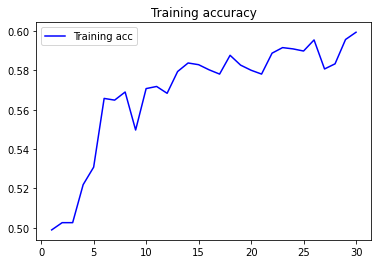

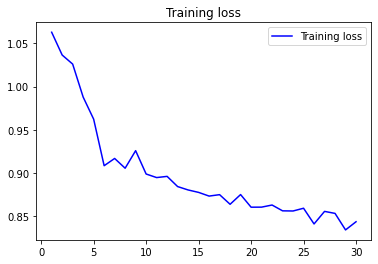

In [46]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.savefig("graphs1.jpg")

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.savefig("graphs2.jpg")

plt.show()

After adding more augmentation the overfitting decreased, but overall accuracy did. The effect of augmentating the data can be found in the bouncy loss and accuracy. The reason why the graph is bouncy is because the data augmentation is random, and some of the images in the batch to train the model may not be recognizable to the model before. It does not allow the model to memorize the images, but rather have it look for specific features.

We added epochs and more augmentation and the accuracy increased once again. Going to try to lower the batch size so more steps will occur during the training. Very little to none overfitting occuring.

In [1]:
# 144/144 [==============================] - 2s 10ms/step - loss: 0.7808 - categorical_accuracy: 0.6148 - accuracy: 0.6148
# Train loss: 0.7807929515838623
# Train accuracy: 0.6148003339767456
# 17/17 [==============================] - 0s 11ms/step - loss: 0.8054 - categorical_accuracy: 0.6218 - accuracy: 0.6218
# validation loss: 0.805367648601532
# validation accuracy: 0.6218323707580566
# 40/40 [==============================] - 1s 13ms/step - loss: 0.9841 - categorical_accuracy: 0.5809 - accuracy: 0.5809
# Test loss: 0.9841442108154297
# Test accuracy: 0.5809226036071777

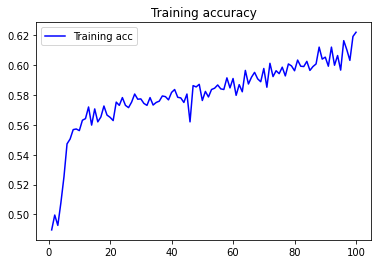

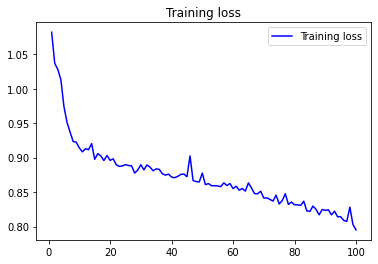

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.savefig("graphs1.jpg")

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.savefig("graphs2.jpg")

plt.show()

Lowering batch size did not do anything productive to the model. It made the model stop learning earlier

#### New Architecture

In [ ]:
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d (Conv2D)              (None, 70, 59, 256)       20992     
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 24, 20, 256)       0         
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 8, 7, 256)         5308672   
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
# _________________________________________________________________
# conv2d_2 (Conv2D)            (None, 1, 1, 256)         5308672   
# _________________________________________________________________
# max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
# _________________________________________________________________
# flatten (Flatten)            (None, 256)               0         
# _________________________________________________________________
# dense (Dense)                (None, 100)               25700     
# _________________________________________________________________
# dense_1 (Dense)              (None, 4)                 404       
# =================================================================
# Total params: 10,664,440
# Trainable params: 10,664,440
# Non-trainable params: 0
# _________________________________________________________________

Decided that the data augmentation does a well enough job to stop overfitting of the images. Want to see what happens when a new convulational layer is added.

In [ ]:
# 144/144 [==============================] - 2s 12ms/step - loss: 0.9968 - categorical_accuracy: 0.5011 - accuracy: 0.5011
# Train loss: 0.996800422668457
# Train accuracy: 0.5010850429534912
# 17/17 [==============================] - 0s 14ms/step - loss: 1.0087 - categorical_accuracy: 0.5263 - accuracy: 0.5263
# validation loss: 1.0086710453033447
# validation accuracy: 0.5263158082962036
# 40/40 [==============================] - 1s 16ms/step - loss: 0.9638 - categorical_accuracy: 0.5192 - accuracy: 0.5192
# Test loss: 0.9638105034828186
# Test accuracy: 0.5191555619239807

This is after 10 epochs, but training can certaintly continue, so will be increasing epochs.

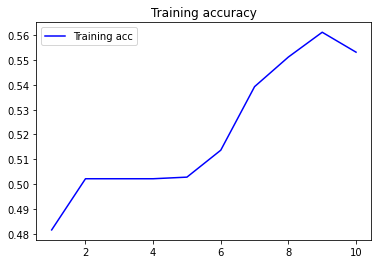

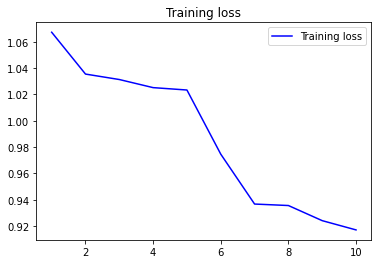

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.savefig("graphs1.jpg")

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.savefig("graphs2.jpg")

plt.show()

More epochs did not help that much. Test accuracy increased to 55%.

# Sources

[1] https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
- learned what class weight is and how to use

[2] https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/
- learned that you can add droput to CNN

[3] https://betterdatascience.com/tensorflow-for-computer-vision-how-to-increase-model-accuracy-with-data-augmentation/
- datagenerator use

[4] https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#fit
- datagenerator use